<a href="https://colab.research.google.com/github/yexf308/AdvancedMachineLearning/blob/main/Manifold_learning_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This lecture is partially based on Prof. Guangliang Chen's [course slides.](https://www.sjsu.edu/faculty/guangliang.chen/Math250.html)

In [1]:
%pylab inline 
from IPython.display import Image
import numpy.linalg as LA

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mb#1{\mathbb{#1}}$
# Multidimensional Scaling (MDS)
Suppose we are given points in a very high dimensional space $\{\m{x}^{(i)}\}_{i=1}^N\in \mb{R}^D$, with some kind of distance $\ell_{ij} =\|\m{x}^{(i)}- \m{x}^{(j)} \|$. We
would like to find low dimensional representations $\{\m{z}^{(i)}\}_{i=1}^N\in \mb{R}^d$ for some $d<D$, which can (approximately) preserve the given distances.


In [2]:
display(Image(url='https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/MDS.png?raw=true', width=600))


## Mathematical derivation 
Here we use the Euclidean distance $l_2$.

It first follows the equation
$$\|\m{z}^{(i)}-\m{z}^{(j)}\|_2 = \ell_{ij} $$

We also observe the solutions are not unique,
as any translation of the new points preserves the pairwise distances.

So we can remove the translational invariance by adding a constraint
$\sum \m{z}_i =0 $. This will be our constraint. 

- $\ell_{ij}^2=\|\m{z}^{(i)}\|^2 + \|\m{z}^{(j)}\|^2 -2(\m{z}^{(i)})^\top \m{z}^{(j)} $

- Summing over $i$ and $j$ separately gives that
\begin{align}
 \sum_i\ell_{ij}^2&=\sum_i\|\m{z}^{(i)}\|^2 + \sum_i\|\m{z}^{(j)}\|^2 -\sum_i2(\m{z}^{(i)})^\top \m{z}^{(j)} \\
 &=\sum_i\|\m{z}^{(i)}\|^2 +N \|\m{z}^{(j)}\|^2 
 \end{align}
Similarly, 

$$\sum_j\ell_{ij}^2=\sum_j\|\m{z}^{(j)}\|^2 +N \|\m{z}^{(i)}\|^2 $$

$\|\m{z}^{(i)}\|^2 $ and \|\m{z}^{(j)}\|^2 are not known explicitly, however, we can apply the trick of "double centering" of $\m{D}$ to calculate them.  

Denote $\m{D} = (\ell_{ij}^2)$ and  its column, row and overall sums 
\begin{align}
& \mb{1}^\top \m{D}: \ell_{\cdot j}^2 = \sum_i \ell_{ij}^2 =\sum_i\|\m{z}^{(i)}\|^2 +N \|\m{z}^{(j)}\|^2 \\ 
& \m{D}\mb{1}: \ell_{i \cdot}^2 = \sum_j \ell_{ij}^2 = \sum_j\|\m{z}^{(j)}\|^2 +N \|\m{z}^{(i)}\|^2 \\ 
& \mb{1}^\top\m{D}\mb{1}=\ell_{\cdot \cdot}^2 = \sum_i\sum_j \ell_{ij}^2 = N \|\m{z}^{(i)}\|^2 +N \|\m{z}^{(j)}\|^2 = 2N\sum_t\|\m{z}^{(t)}\|^2
\end{align}

This implies that 
\begin{align}
 \sum_t\|\m{z}^{(t)}\|^2 = \frac{1}{2N} \ell_{\cdot \cdot}^2
\end{align}
Plugging it back, we then find for any $i,j$, 
\begin{align}
&\|\m{z}^{(i)}\|^2 = \frac{1}{N}\ell_{\cdot j}^2 - \frac{1}{2N^2}\ell_{\cdot \cdot}^2 \\ 
& \|\m{z}^{(j)}\|^2 = \frac{1}{N}\ell_{i \cdot}^2 - \frac{1}{2N^2}\ell_{\cdot \cdot}^2  \\ 
& (\m{z}^{(i)})^\top \m{z}^{(j)} = \underbrace{\frac{1}{2}\left(\frac{1}{N}\ell_{\cdot j}^2 + \frac{1}{N}\ell_{i \cdot}^2 -\frac{1}{N^2}\ell_{\cdot \cdot}^2 -\ell_{ij}^2\right)}_{\triangleq g_{ij}}
\end{align}

Let 
- $\m{G}=(g_{ij})\in \mb{R}^{N\times N}$: the gram matrix 

- $\m{Z}=[\m{z}^{(1)}, \m{z}^{(2)}, \dots, \m{z}^{(N)}]^\top \in \mb{R}^{N\times d}$: the embedding matrix. 

The last equation may be rewritten as
\begin{align}
\boxed{\m{Z} \m{Z}^\top=\m{G}}
\end{align}
**Goal:** Given $\m{G}$, find $\m{Z}$. 

- The solution of the MDS problem, if it exists, is still not unique. The reason is that any rotation of $\m{Z}$ (like rotating your map), i.e, $\m{Z}\m{Q}$ for some orthogonal matrix $\m{Q}$ s also a solution, $(\m{Z}\m{Q})(\m{Z}\m{Q})^\top=\m{Z} \m{Z}^\top$.

- In practice, we only need to find one solution to represent the given data in a Euclidean space.




### Property of matrix $\m{G}$.
We have the following representation for $\m{G}$
$$\m{G}= -\frac{1}{2}\m{H}\m{D}\m{H} $$
where $\m{H}= \m{I}_N-\frac{1}{N}\mb{1}\mb{1}^\top$. 

Proof: 
\begin{align}
\m{H}\m{D}\m{H}&=(\m{I}_N-\frac{1}{N}\mb{1}\mb{1}^\top) \m{D} (\m{I}_N-\frac{1}{N}\mb{1}\mb{1}^\top) \\
&= \m{D}-\frac{1}{N}\mb{1}\mb{1}^\top\m{D} -\frac{1}{N}\m{D}\mb{1}\mb{1}^\top+\frac{1}{N^2}\mb{1}\mb{1}^\top\m{D}\mb{1}\mb{1}^\top = -2\m{G}. 
\end{align}

- All the rows (and columns) of $\m{H}$ sum to zero, due to 
$$ \m{H}\mb{1}=(\m{I}_N-\frac{1}{N}\mb{1}\mb{1}^\top)\mb{1}=\mb{0}$$

- As a result, all the rows (and columns) of $\m{G}$ sum to zero, 
$$\m{G}\mb{1}= -\frac{1}{2}\m{H}\m{D}\m{H} \mb{1}=\mb{0} $$
  This implies that $\m{G}$ has the zero eigenvalue. 

- In order for a solution to exist, $\m{G}$ must be positive semidefinite. Then we have the decomposition, 
$$ \m{G} = \m{U}\m{\Lambda}\m{U}^\top=\underbrace{\m{U}\m{\Lambda}^{1/2}}_{=\m{Z}}\underbrace{\m{\Lambda}^{1/2}\m{U}^\top}_{=\m{Z}^\top} $$




**Theorem:** If $\m{G}$ is is positive semidefinite and the rank of $\m{G}$ is $r$, then the MDS problem has the following exact solution, 
$$ \m{Z}=\m{U}_r\Sigma_r=[\sqrt{\lambda_1}\m{u}_1,  \dots, \sqrt{\lambda_r}\m{u}_r]\in \mb{R}^{N\times r}$$
where $(\lambda_i, \m{u}_i)$ are the eigenpairs of the $\m{G}$ matrix.



---


If the eigenvalues decay rapidly, we can truncate the columns to
obtain an approximate solution
$$ \m{Z}_{r_0}\approx\m{U}_{r_0}\Sigma_{r_0}=[\sqrt{\lambda_1}\m{u}_1,  \dots, \sqrt{\lambda_{r_0}}\m{u}_{r_0}]\in \mb{R}^{N\times r_0}$$
where $r_0<r$ is the number of dominant (or chosen) eigenvalues.

### Relationship to PCA
In the setting of vector data $\{\m{x}^{(i)}\}_{i=1}^N\in \mb{R}^D$ with the goal of preserving Euclidean distances, the MDS approach is equivalent to PCA.

To see this, note that in this case we can repeat the previous procedure with the centered data $\tilde{\m{X}}$ to obtain that 
$$\|\tilde{\m{x}}^{(i)}-\tilde{\m{x}}^{(j)} \|_2=\ell_{ij} \rightarrow \m{G}= \tilde{\m{X}}\tilde{\m{X}}^\top =\m{U}\m{\Sigma}^2\m{U}^\top$$

Similarly, we can use the dorminant eigenvalues of $\m{\Sigma}$ to approximate $\m{Z}$. 

This shows that PCA also tries to preserve, as much as possible, the pairwise Euclidean distances of the original data.

The advantage here is if some data only consists of distances without the coordinates information, we can still apply MDS which is equilvalent with PCA. 

### PCA or MDS?
- If $D$ is not large and $N$ is very large, use PCA, since dimension of $\m{G}$ is $N\times N$ and dimension of $\m{X}$ is $N\times D$.  

- If $N$ is not large and $D$ is very large, use MDS.



## The (classical) MDS algorithm
**Input**: Matrix of squared pairwise distances $\m{D}\in \mb{R}^{N\times N}$.

**Output**: A $d$-dimensional representation of the data: $\m{Z}\in\mb{R}^{N\times d}$

**Steps:** 
1. Compute the matrix $\m{G}=-\frac{1}{2}\m{H}\m{D}\m{H}$ (should not use it directly)

2. Find the top dorminant $d$ eigenvectors of $\m{G}$: $\m{G}\approx \m{U}_d\m{\Lambda}_d\m{U}_d^\top$.

3. Form the embedding matrix: $\m{Z}=\m{U}_d\m{\Lambda}_d^{1/2}$

### How to choose $d$
In general, to select $d$ and evaluate the quality of approximation by MDS, one can use the following measure.

The **Kruskal stress** is defined as
$$ \text{stress} = \sqrt{\frac{\sum_{ij}(\ell_{ij}- \|\m{z}^{(i)}-\m{z}^{(j)}\|_2)^2}{\sum_{ij}\ell_{ij}^2}}$$

Empirically,
- the fit is good if stress$<0.1$

- unacceptable if stress$>0.15$.  

In [3]:
names = ['Atl','Chi','Den','Hou','LA','Mia','NYC','SF','Sea','WDC']
L = np.array([
           [0 ,587, 1212,  701, 1936,  604,  748, 2139, 2182, 543],
           [587, 0,  920,  940, 1745, 1188,  713, 1858, 1737,  597],
           [1212,920, 0,  879,  831, 1726, 1631, 949, 1021,  1494],
           [701,  940,  879, 0, 1374,  968, 1420, 1645, 1891, 1220],
           [1936, 1745,  831, 1374, 0, 2339, 2451,  347,  959, 2300],
           [604, 1188, 1726,  968, 2339, 0, 1092, 2594, 2734,  923],
           [748,  713, 1631, 1420, 2451, 1092, 0, 2571, 2408,  205],
           [2139, 1858,  949, 1645,  347, 2594, 2571, 0,  678,  2442],
           [2182, 1737, 1021, 1891,  959, 2734, 2408,  678 ,   0,  2329],
           [543,  597, 1494, 1220, 2300,  923,  205, 2442, 2329 ,   0]
])



In [4]:
def MDS(L,d,figure=False):
  '''
    L is the pairwise distance matrix.
     
  '''
  D = L*L
  N = D.shape[1]
  onesN  = ones(N)
  DonesN = dot(D, onesN)
  G2 = array([onesN]).T @ array([DonesN])/N
  G  = -(D-G2-G2.T+sum(DonesN)/N**2)/2
  U,Lambda,Vh = svd(G)
  Z = dot(U[:,:d], diag(sqrt(Lambda[:d])))
  if figure:
    plt.scatter(arange(1,N+1), Lambda)
  return Z


In [5]:
def stress(L, Z):
  N = L.shape[1]
  Z_dis = zeros([N,N])
  for i in range(N):
    for j in range(N):
      Z_dis[i,j] = norm(Z[i]-Z[j])

  num = sum( (L - Z_dis)**2 ) 
  D = L * L
  den = sum(D) 
  return sqrt(num/den)


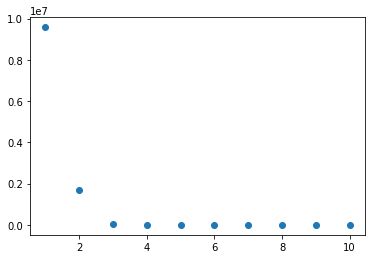

In [6]:
Z=MDS(L,2,figure=True)
# this plots the eigenvalues of G 
# Z is two dimension embedding

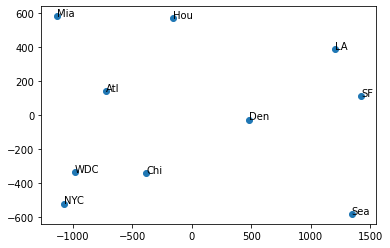

In [7]:
plt.scatter(Z[:,0], Z[:,1])
for i, txt in enumerate(names):
  plt.annotate(txt, (Z[i,0], Z[i,1]))

# this matches with US map quite well.

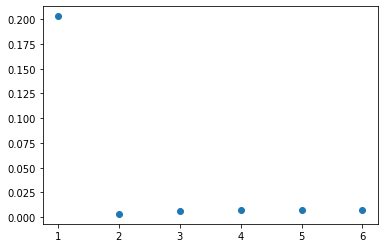

In [8]:
# what about the stress value in other dimensions
s_list=[]
for d in range(1,7):
  Z=MDS(L,d)
  s_list.append(stress(L, Z))

scatter(arange(1,7),s_list)
# so d=2 is a good choice here. 

## Swiss roll manifold
Here we have the coordinate so we can directly apply the PCA.

In [11]:
from sklearn.datasets import make_swiss_roll
import plotly.express as px

n_samples = 1000
noise = 0.05
X, color = make_swiss_roll(n_samples, noise=noise)
fig =  px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=color, size=5*ones(1000))
fig.show()

In [12]:
# PCA
X_mean              = np.mean(X, axis=0)
X = X - X_mean
u, s, vh =svd(X, full_matrices=False)

# project onto 2-dim
V = vh.T
Z = dot(X, V[:,:2] )
fig =  px.scatter(x=Z[:, 0], y=Z[:, 1], color=color)
fig.show()

## Handwritten digit


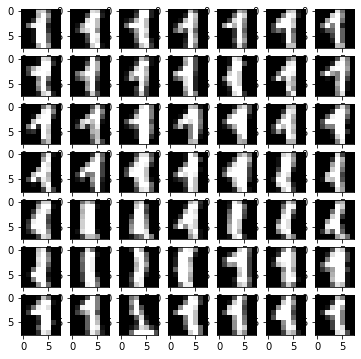

In [14]:
from sklearn.datasets import load_digits
digits = load_digits() 

X = digits.data
y = digits.target 
Xone = X[y==1]

fig, axs = plt.subplots(7, 7,figsize=(6,6))
axs = axs.ravel()
for i in range(49):
  axs[i].imshow(Xone[i].reshape([8,8]), cmap=pyplot.get_cmap('gray'))

[0.5424514094645001,
 0.33747710756993293,
 0.25102875083410486,
 0.18886083052258995,
 0.15334283068894505,
 0.12146865172049791,
 0.10347929492046125,
 0.08864014608799929,
 0.07739596376799857]

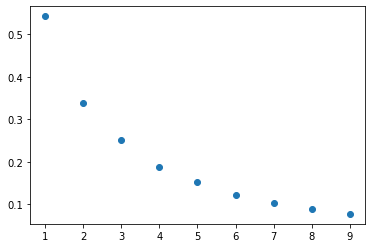

In [24]:
N = Xone.shape[0]
L = zeros([N,N])
for i in range(N):
  for j in range(N):
    L[i,j]=norm(Xone[i]-Xone[j])

s_list=[]
for d in range(1,10):
  Z=MDS(L,d)
  s_list.append(stress(L, Z))

scatter(arange(1,10),s_list)
s_list